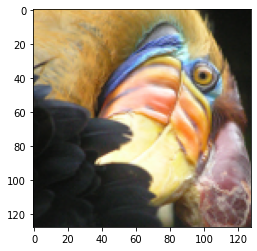

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import time

# imoprting the base image and processng it so that the colors are right
img0=cv2.imread('/Users/glenan/Documents/JupyterNB/T+CI/ex9Data/bird_small.tiff')
img0=cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
plt.imshow(img0)

# reshaping the image matrix
img=img0.reshape((img0.shape[1]*img0.shape[0],3))

In [2]:
# specifying the number of clusters
kmeans=KMeans(n_clusters=2)
# and feedint the image to the algorithm
s=kmeans.fit(img)

# label : cluster to which each pixel is associated pixel
labels=kmeans.labels_
labels=list(labels)

# centroid : value to chich each label is associated
centroid=kmeans.cluster_centers_

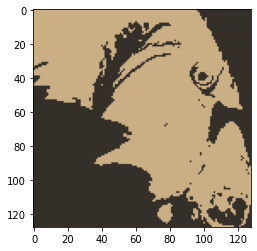

In [3]:
# reconstrucing an image from the new colors given by the centroid values 
# for each label (each pixel)
new_img = []
for label in labels:
    new_img.append(centroid[label]/255)

# splitting the array in 128 lines to rebuilt an actual image
def rebuild(img_as_list):
    img_as_array = np.asarray(img_as_list)
    return np.split(img_as_array,128)


img1 = np.asarray(rebuild(new_img))
plt.imshow(img1)

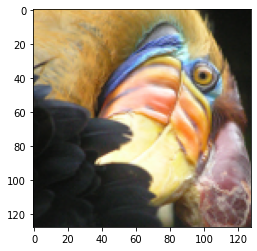

In [4]:
plt.imshow(img0)

In [5]:
# Mean Square Error calculation
def MSE(src,dest):
    s = np.zeros(3)
    for l in range(128):
        for p in range(128):
            C_src = src[l][p]
            C_dest =  [round(dest[l][p][k]*255) for k in range(3)]
            D = np.asarray([(C_src[k] - C_dest[k])**2 for k in range(3)])
            s = np.add(s,D)
    return s/(128**2)

In [6]:
# the mean square error gives the mean squared distance between each color value for each color
MSE(img0,img1)

array([1530.93487549, 1267.62982178, 1728.53881836])

In [7]:
# RLE encoder from lab 1
def RLE_encoder(labels):
    currentlabel = labels[0]
    RLE_data = []
    RLE_data.append((1,currentlabel))
    
    for label in labels:
        if label==currentlabel :
            #we increment the last stored tuple
            tmp_tup = RLE_data[-1]
            RLE_data[-1] = (tmp_tup[0]+1,tmp_tup[1])
        else :
            #we add the new sequence beginning to the RLE array
            RLE_data.append((1,label))
            currentlabel = label
    return RLE_data

In [8]:
#RLE_encoder(labels)

In [9]:
# returns the distribution of values of a given vector (from LAB 1)
def get_Distribution(vector):
    #as we used a np.vector to create a random vector, its elements are countable with the following
    values, counts = np.unique(vector, return_counts=True)
    #a new array of *observed* probabilities is thus created
    
    #distribution = counts/len(rand_vector)
    return dict(zip(values, counts/len(vector)))


# returns the entropy from a vector (from LAB 1)
def entropy_V(vector):
    entropy = 0
    distr = get_Distribution(vector)
    for p_k in distr.values():
        if (p_k!=0):
            entropy -= p_k * math.log2(p_k)
    return entropy

[array([1530.93487549, 1267.62982178, 1728.53881836]), array([ 964.33453369,  599.43939209, 1030.54187012]), array([626.31829834, 386.91711426, 773.63903809]), array([501.0480957 , 361.74359131, 582.10040283]), array([428.72198486, 285.49005127, 470.3012085 ]), array([395.13818359, 246.8894043 , 391.00561523]), array([331.63531494, 210.46673584, 365.9630127 ]), array([320.94866943, 185.04803467, 321.699646  ]), array([274.27862549, 193.34527588, 279.99645996]), array([234.57489014, 173.68243408, 269.6897583 ]), array([215.05780029, 155.77545166, 246.14910889]), array([194.90911865, 153.14227295, 224.10241699]), array([167.50970459, 150.57537842, 216.15264893]), array([153.00897217, 143.03149414, 200.63482666]), array([146.61645508, 133.31427002, 187.55548096]), array([140.75091553, 129.29821777, 174.25610352]), array([135.7041626 , 120.67425537, 164.13922119]), array([121.79272461, 119.37316895, 159.96362305])]


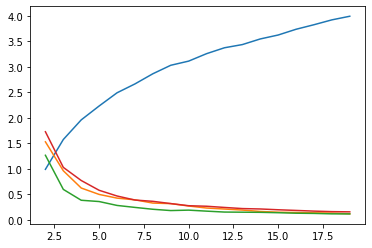

In [12]:
entropy = []
k = []
mse = []

# we now compute new images with an increasing number of centroids
# from 2 to 20 centroids, higher values will take longer to finish
for i in range(2,20):
    kmeans=KMeans(n_clusters=i).fit(img)

    kmeans_labels = kmeans.labels_
    kmeans_labels_list = list(kmeans_labels)

    centroid=kmeans.cluster_centers_

    a = []

    for label in kmeans_labels_list:
        a.append(centroid[label]/255)


    img1 = np.asarray(rebuild(a))
    
    entropy.append(entropy_V(kmeans_labels))
    k.append(i)
    
    mse.append(MSE(img0,img1))

#print(mse)    
plt.plot(k,entropy)
mse_r = [mse[k][0]/1000 for k in range(len(mse))]
mse_g = [mse[k][1]/1000 for k in range(len(mse))]
mse_b = [mse[k][2]/1000 for k in range(len(mse))]
plt.plot(k,mse_r)
plt.plot(k,mse_g)
plt.plot(k,mse_b)

As we can, see, as the number of centroids increases : 
 * the entropy of the source increases
 * the MSE for each color component decreases drastically
(plotting both the entropy and the MSE on the same graph requires to scale down a bit the MSEs).